In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/GirlsScriptOpenSource/Feedforwardnetwork(titanic)/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/GirlsScriptOpenSource/Feedforwardnetwork(titanic)/test.csv")
gender_submission = pd.read_csv("/content/drive/MyDrive/GirlsScriptOpenSource/Feedforwardnetwork(titanic)/gender_submission.csv")

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [35]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
train_data.isnull()
#no null valuse

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
# Preprocessing the data
# For simplicity, we will drop columns like 'Name', 'Ticket', and 'Cabin'
train_data = train_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
test_data = test_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]


In [38]:
# Convert 'Sex' column to numerical values
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

<ipython-input-38-0b615b94083b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
<ipython-input-38-0b615b94083b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})


In [39]:
# Drop rows with missing values for simplicity
train_data = train_data.dropna()
test_data = test_data.dropna()


In [40]:
# Splitting the data into features and labels
X_train = train_data.drop(['PassengerId', 'Survived'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop('PassengerId', axis=1)

In [41]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [42]:

# Define the architecture of the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

In [43]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [44]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.6483 - accuracy: 0.6611
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.7927
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7941
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8025
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8137
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8207
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4149 - accuracy: 0.8179
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.8291
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 0.8347
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8389
Epoch 11/

In [45]:
history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

Epoch 1/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3406 - accuracy: 0.8613
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8641
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8627
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8627
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8613
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8613
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8627
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8627
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8655
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8655
Epoch 11/

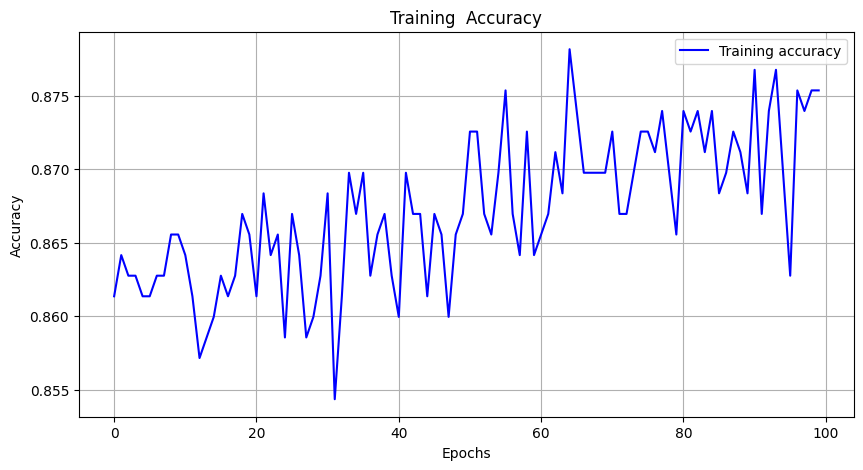

In [46]:
# Plotting the accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], 'b', label='Training accuracy')
plt.title('Training  Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Predict survival outcomes for the test data
predictions = model.predict(X_test_scaled)
predictions = np.round(predictions).astype(int)

11/11 [==============================] - 0s 2ms/step


In [48]:
print(predictions)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]


In [49]:
# Create a DataFrame for submission
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions.flatten()})

# Save the submission file
submission.to_csv('submission.csv', index=False)